# Supplement: Structural validation plots of manipulated connectomes
- Layer-wise connection probabilities and differences to original
- From structural comparison, as part of _Connectome-Manipulator_ framework

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [2]:
save_path = './figs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
# save_path = None

In [22]:
struct_files = {'Baseline': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/simplified_connectome_models/struct_comparison/O1v5-SONATA/data/Orig_ConnPerLayer_mc2EE.pickle', 'group': 'baseline'},

                'Order 1': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/simplified_connectome_models/struct_comparison/O1v5-SONATA/data/Order-1_ConnPerLayer_mc2EE.pickle', 'group': 'remove_struct'},
                'Order 2': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/simplified_connectome_models/struct_comparison/O1v5-SONATA/data/Order-2_ConnPerLayer_mc2EE.pickle', 'group': 'remove_struct'},
                'Order 3': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/simplified_connectome_models/struct_comparison/O1v5-SONATA/data/Order-3_ConnPerLayer_mc2EE.pickle', 'group': 'remove_struct'},
                'Order 4': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/simplified_connectome_models/struct_comparison/O1v5-SONATA/data/Order-4_ConnPerLayer_mc2EE.pickle', 'group': 'remove_struct'},
                'Order 5': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/simplified_connectome_models/struct_comparison/O1v5-SONATA/data/Order-5_ConnPerLayer_mc2EE.pickle', 'group': 'remove_struct'},

                '100k': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/enhanced_connectivity/struct_comparison/O1v5-SONATA/data/Enhanced100K_ConnPerLayer_mc2EE.pickle', 'group': 'add_struct'},
                '200k': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/enhanced_connectivity/struct_comparison/O1v5-SONATA/data/Enhanced200K_ConnPerLayer_mc2EE.pickle', 'group': 'add_struct'},
                '300k': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/enhanced_connectivity/struct_comparison/O1v5-SONATA/data/Enhanced300K_ConnPerLayer_mc2EE.pickle', 'group': 'add_struct'},
                '400k': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/enhanced_connectivity/struct_comparison/O1v5-SONATA/data/Enhanced400K_ConnPerLayer_mc2EE.pickle', 'group': 'add_struct'},
                '500k': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/enhanced_connectivity/struct_comparison/O1v5-SONATA/data/Enhanced500K_ConnPerLayer_mc2EE.pickle', 'group': 'add_struct'},
                '670k': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/enhanced_connectivity/struct_comparison/O1v5-SONATA/data/Enhanced670K_ConnPerLayer_mc2EE.pickle', 'group': 'add_struct'},

                'RC - 1':  {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_removal/struct_comparison/O1v5-SONATA/data/StructDim56-0_ConnPerLayer_mc2EE.pickle', 'group': 'remove_RC'},
                'RC - 2':  {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_removal/struct_comparison/O1v5-SONATA/data/StructDim56_456-0_ConnPerLayer_mc2EE.pickle', 'group': 'remove_RC'},
                'RC - 3':  {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_removal/struct_comparison/O1v5-SONATA/data/StructDim456-0_ConnPerLayer_mc2EE.pickle', 'group': 'remove_RC'},
                'RC - 4':  {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_removal/struct_comparison/O1v5-SONATA/data/Unstruct-3_ConnPerLayer_mc2EE.pickle', 'group': 'remove_RC'},
                'RC* - 1': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_removal/struct_comparison/O1v5-SONATA/data/Unstruct-0_ConnPerLayer_mc2EE.pickle', 'group': 'remove_RC'},
                'RC* - 2': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_removal/struct_comparison/O1v5-SONATA/data/Unstruct-1_ConnPerLayer_mc2EE.pickle', 'group': 'remove_RC'},
                'RC* - 3': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_removal/struct_comparison/O1v5-SONATA/data/Unstruct-2_ConnPerLayer_mc2EE.pickle', 'group': 'remove_RC'},

                'RC + 1':  {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_addition/struct_comparison/O1v5-SONATA/data/struct0_2x_ConnPerLayer_mc2EE.pickle', 'group': 'add_RC'},
                'RC + 2':  {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_addition/struct_comparison/O1v5-SONATA/data/struct0_4x_ConnPerLayer_mc2EE.pickle', 'group': 'add_RC'},
                'RC* + 1': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_addition/struct_comparison/O1v5-SONATA/data/control0_2x_ConnPerLayer_mc2EE.pickle', 'group': 'add_RC'},
                'RC* + 2': {'file': '/gpfs/bbp.cscs.ch/project/proj9/bisimplices/pokorny/reciprocal_addition/struct_comparison/O1v5-SONATA/data/control0_4x_ConnPerLayer_mc2EE.pickle', 'group': 'add_RC'}}

group_titles = {'baseline':      'Baseline',
                'remove_struct': 'Removing structure',
                'add_struct':    'Enhancing structure',
                'remove_RC':     'Removing RCs',
                'add_RC':        'Adding RCs'}

cmaps = {'baseline':      'Greys',
         'remove_struct': 'Blues',
         'add_struct':    'Reds',
         'remove_RC':     'Greens',
         'add_RC':        'RdPu'}

diff_cmap = 'PiYG'

p_ranges = {'baseline':      3,
            'remove_struct': 3,
            'add_struct':    3,
            'remove_RC':     3,
            'add_RC':        3}  # 0-x (%)

diff_ranges = {'baseline':      0.01,
               'remove_struct': 2,
               'add_struct':    0.2,
               'remove_RC':     0.05,
               'add_RC':        0.3}  # +/- (%)

In [5]:
def get_group_keys(grp_dict, grp_name):
    return [k for k, v in grp_dict.items() if v['group'] == grp_name]


def plot_struct_res(struct_file, res_sel, plot_range=[None, None], cmap='hot_r', colorbar=True, ticklabels=True, ax_off=False):
    """Plot structural results."""

    if isinstance(struct_file, list):
        assert len(struct_file) == 2, 'ERROR: Two results files required to compute diff!'
        diff_dicts = []
        for sfile in struct_file:
            with open(sfile, 'rb') as f:
                diff_dicts.append(pickle.load(f))
        struct_dict = results_diff(*diff_dicts)
    else:
        with open(struct_file, 'rb') as f:
            struct_dict = pickle.load(f)
    res_dict = struct_dict[res_sel]
    common_dict = struct_dict['common']

    if plot_range is None:
        plot_range = np.nanmax(np.abs(res_dict['data']))
    if np.isscalar(plot_range):  # +/- symmetric
        vmin = -np.abs(plot_range)
        vmax = np.abs(plot_range)
    else:
        vmin = np.nanmin(res_dict['data']) if plot_range[0] is None else plot_range[0]
        vmax = np.nanmax(res_dict['data']) if plot_range[-1] is None else plot_range[-1]

#     print(f'{res_dict["unit"]} data range: [{np.nanmin(res_dict["data"]):.3f}, {np.nanmax(res_dict["data"]):.3f}]')
#     print(f'{res_dict["unit"]} plot range: [{vmin:.3f}, {vmax:.3f}]')

    h_img = plt.imshow(res_dict['data'], interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.xticks(range(len(common_dict['tgt_group_values'])), common_dict['tgt_group_values'] if ticklabels else [])
    plt.yticks(range(len(common_dict['src_group_values'])), common_dict['src_group_values'] if ticklabels else [])

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if ax_off:
        plt.axis('off')

    if colorbar:
        h_cb = plt.colorbar()
        h_cb.set_label(label=res_dict['unit'], size=None)
        h_cb.ax.tick_params(labelsize=None)

    return h_img


### MODIFIED from Connectome-Manipulator ###
def results_diff(res_dict1, res_dict2):
    """Computes difference between two results data sets [recursively iterates through all sub-dicts to find 'data' entries; all other entries must be equal or will be removed]."""
    res_keys = np.intersect1d(list(res_dict1.keys()), list(res_dict2.keys()))
    for _k in np.setdiff1d(list(res_dict1.keys()), res_keys):
        del res_dict1[_k]
    for _k in np.setdiff1d(list(res_dict2.keys()), res_keys):
        del res_dict2[_k]
    assert np.all(
        [isinstance(res_dict1[k], type(res_dict2[k])) for k in res_keys]
    ), "ERROR: Results type mismatch!"

    diff_dict = {}
    for k in res_keys:
        if isinstance(res_dict1[k], dict):
            diff_dict[k] = results_diff(res_dict1[k], res_dict2[k])  # Recursive update
        else:
            if k == "data":
                assert (
                    res_dict1[k].shape == res_dict2[k].shape
                ), "ERROR: Results data shape mismatch!"
                # assert np.all(res_dict1[k] >= 0) and np.all(res_dict2[k] >= 0), 'ERROR: Negative results value(s) found!'
                diff_dict[k] = res_dict2[k].astype(float) - res_dict1[k].astype(
                    float
                )  # Difference matrix
            else:
                assert np.array_equal(res_dict1[k], res_dict2[k]), "ERROR: Results inconsistency!"
                diff_dict[k] = res_dict1[k]

    return diff_dict


def add_cbar(h, label=None, ticks=None):
    cax = plt.gca().inset_axes([0.1, -0.75, 0.8, 0.5])
    cax.axis('off')
    h_cb = plt.colorbar(h, orientation='horizontal', aspect=10, ax=cax, label=label)
    h_cb.set_ticks(ticks)
    h_cb.set_ticklabels(ticks)
    h_cb.outline.set_linewidth(0)


/nvme/pokorny/2063384/ipykernel_184384/2281501433.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


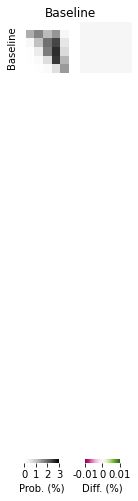

/nvme/pokorny/2063384/ipykernel_184384/2281501433.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


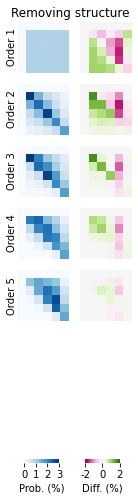

/nvme/pokorny/2063384/ipykernel_184384/2281501433.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


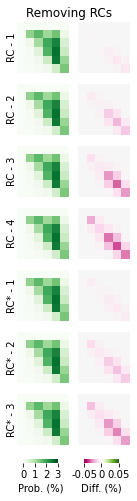

/nvme/pokorny/2063384/ipykernel_184384/2281501433.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


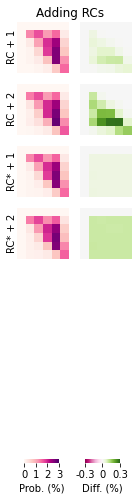

/nvme/pokorny/2063384/ipykernel_184384/2281501433.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


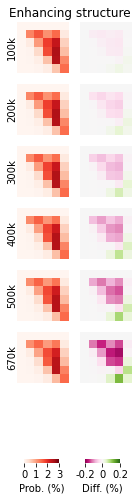

In [23]:
grid_max = 7

for group in ['baseline', 'remove_struct', 'remove_RC', 'add_RC', 'add_struct']:
    res_list = get_group_keys(struct_files, group)
    p_range = p_ranges[group]
    diff_range = diff_ranges[group]

    plt.figure(figsize=[2, 7])
    for idx in range(grid_max):
        plt.subplot(grid_max, 2, idx * 2 + 1)
        if idx < len(res_list):
            res_name = res_list[idx]
            h_res = plot_struct_res(struct_files[res_name]['file'], 'conn_prob', plot_range=[0, p_range], colorbar=False, cmap=cmaps[struct_files[res_name]['group']], ticklabels=False, ax_off=True)
            plt.text(np.min(plt.xlim()), np.mean(plt.ylim()), res_name, ha='right', va='center', rotation=90)
        else:
            plt.axis('off')
        if idx == grid_max - 1:
            add_cbar(h_res, label='Prob. (%)', ticks=range(np.floor(p_range).astype(int) + 1))

        plt.subplot(grid_max, 2, idx * 2 + 2)
        if idx < len(res_list):
            h_diff = plot_struct_res([struct_files['Baseline']['file'], struct_files[res_name]['file']], 'conn_prob', plot_range=diff_range, colorbar=False, cmap=diff_cmap, ticklabels=False, ax_off=True)
        else:
            plt.axis('off')
        if idx == grid_max - 1:
            add_cbar(h_diff, label='Diff. (%)', ticks=[-diff_range, 0, diff_range])
    plt.suptitle(group_titles[group], y=0.96)

    plt.tight_layout()
    if save_path is not None:
        plt.savefig(os.path.join(save_path, f'struct_validation__{group}.png'), dpi=600, bbox_inches='tight')
        plt.savefig(os.path.join(save_path, f'struct_validation__{group}.svg'), dpi=600, bbox_inches='tight')
        plt.savefig(os.path.join(save_path, f'struct_validation__{group}.pdf'), dpi=600, bbox_inches='tight')
    plt.show()